# Outline

- **[1 - Problem Statement](#1)**
    - [1.1 Data Content](#1.1)
    - [1.2 Install Packages and Reading Data](#1.2)
    
### Exploratory Data Analysis

- **[2 - Univariate Visualizations](#2)**
    - [2.1 - Columns Insights](#3)
- **[3 - Bivariate Visualizations](#4)**
    - [3.1 - Bivariate Conclusion](#3)
- **[4 - Multivariate Visualizations](#5)**
    - [4.1 - EDA Conclusion](#6)
    
### Machine Learning

- **[5 - Data Preparation for ML](#7)**
- **[6 - Apply Machine Learning Algorithms](#8)**
- **[7 - Best Model](#9)**


<br>

---

<br>


<a name ="1"></a>
## Problem Statement

### Context
- Identify customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement. In order to meet customer expectations and achieve higher quality levels, airlines needs to develop a specific mechanism of passenger satisfaction measurement.

- This is a <font color = 'green'>classification</font> supervised machine learning project, Predicting Satisfaction of Airline Passengers.

- This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

<br>

### Datatset
- This dataset is obtained from Kaggle: [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

<a name ="1.1"></a>
<br>
<br>

<details>
    <summary><font size="3"><b>Attributes (Click to expand)</b></font></summary>


<br>

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival
    
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

<br>

---

<a name = "1.2"></a>
## Packages

In [1]:
import pandas as pd,numpy as np,seaborn as sns, matplotlib.pyplot as plt 

In [40]:
data = pd.read_csv("../../TheData/airline_passenger_satisfaction.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
data.drop(columns=['ID'],inplace=True)

<a name ='2'></a>

## Individual Columns Exploration

In [91]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

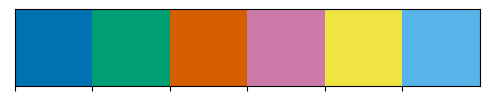

In [5]:
plt.style.use("seaborn-colorblind")
sns.palplot(sns.color_palette())
plt.show()

In [6]:
categorical_data = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_data

['Type of Travel', 'Class', 'Customer Type', 'Gender', 'Satisfaction']

In [7]:
for i in categorical_data:
    print(i)
    print(data[i].unique())
    print('--'*20)

Type of Travel
['Business' 'Personal']
----------------------------------------
Class
['Business' 'Economy' 'Economy Plus']
----------------------------------------
Customer Type
['First-time' 'Returning']
----------------------------------------
Gender
['Male' 'Female']
----------------------------------------
Satisfaction
['Neutral or Dissatisfied' 'Satisfied']
----------------------------------------


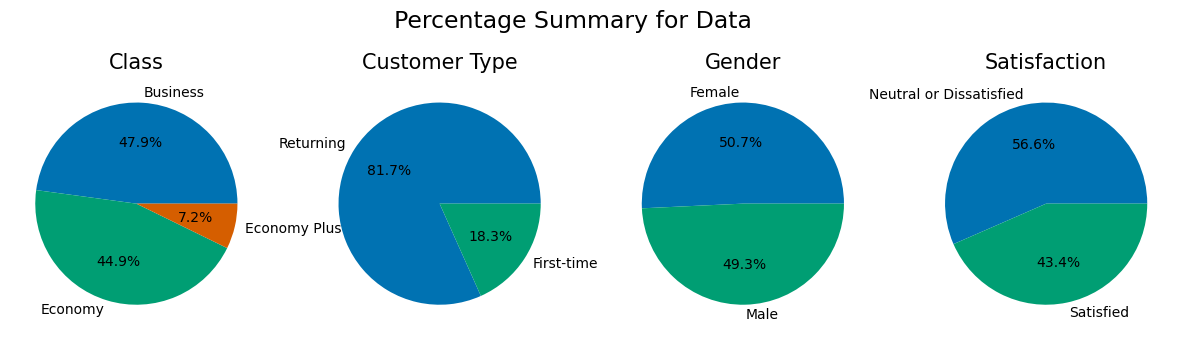

In [8]:
fig,ax = plt.subplots(1,len(categorical_data)-1,figsize=(15,4))
for ind,i in enumerate(categorical_data[1:]):
    d = data[i].value_counts()
    ax[ind].pie(d,autopct = '%1.1f%%',labels=d.index)
    ax[ind].set_title(i,size=15)
fig.suptitle("Percentage Summary for Data",size=17)
plt.show()

---

let's look at ( Age, Flight Distance, Departure Delay and Arrival Delay )columns

In [9]:
data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


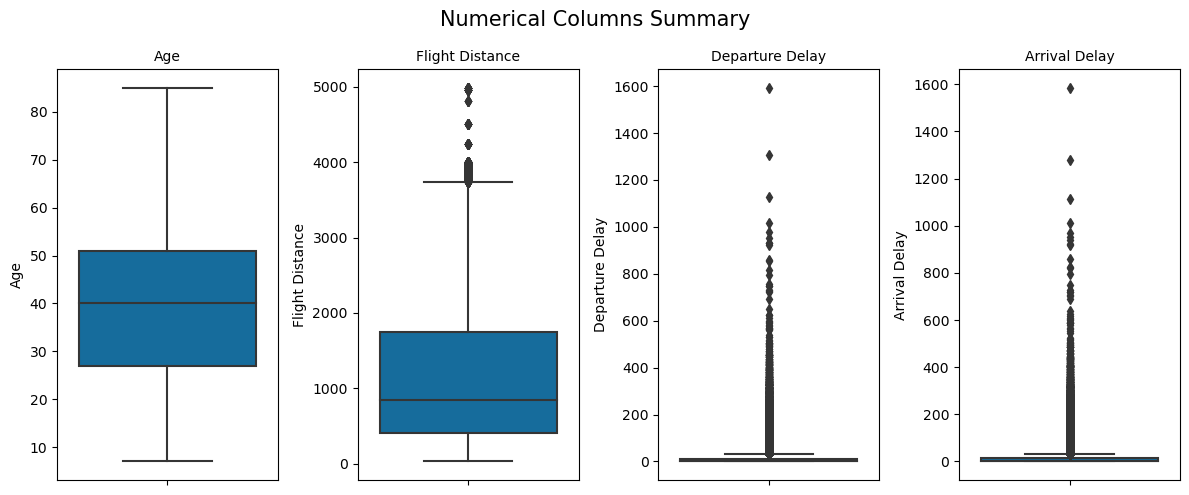

In [10]:
numerical_columns=data.describe().columns[:4]

fig,axes = plt.subplots(1,len(numerical_columns),figsize=(12,5))
for ind,col in enumerate(numerical_columns):
    sns.boxplot(data=data,ax=axes[ind],y=col)
    axes[ind].set_title(col,size=10)
    
fig.suptitle("Numerical Columns Summary",size=15)
fig.tight_layout()
plt.show()

In [11]:
from scipy.stats import iqr

In [12]:
data.loc[:,numerical_columns]

,Age,Flight Distance,Departure Delay,Arrival Delay
0,48,821,2,5.0
1,35,821,26,39.0
2,41,853,0,0.0
3,50,1905,0,0.0
4,49,3470,0,1.0
...,...,...,...,...
129875,28,447,2,3.0
129876,41,308,0,0.0
129877,42,337,6,14.0
129878,50,337,31,22.0


In [13]:
data.isna().sum()[data.isna().sum()!=0]/data.shape[0]*100

Arrival Delay    0.302587
dtype: float64

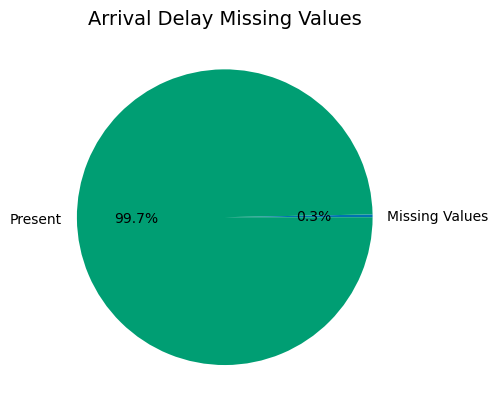

In [14]:
isnull = data['Arrival Delay'].isnull().sum()/data.shape[0]*100

plt.pie([isnull,100-isnull],labels=['Missing Values','Present'],autopct='%1.1f%%')
plt.title("Arrival Delay Missing Values",size=14)
plt.show()

In [15]:
data.dropna(axis=0,subset=['Arrival Delay'],inplace=True)

In [16]:
liss = []
for col in numerical_columns:
    maxi = (1.5*iqr(data[col]))+np.quantile(data[col],.90)
    outlires = data[data[col]>maxi]
    print(col.capitalize()+' '+str(outlires.shape[0]/data.shape[0]*100)[:10]+' %')
# outlires

Age 0.0 %
Flight distance 0.03166341 %
Departure delay 6.72808853 %
Arrival delay 6.60915767 %


In [17]:
maxdict = {}
for col in numerical_columns:
    maxdict[col]=(1.5*iqr(data[col]))+np.quantile(data[col],.90)
maxdict

{'Age': 95.0,
 'Flight Distance': 4747.0,
 'Departure Delay': 61.0,
 'Arrival Delay': 63.5}

In [18]:
outlires = data[(data['Flight Distance']>maxdict['Flight Distance'] )| (data['Departure Delay']>maxdict['Departure Delay']) | (data['Arrival Delay']>maxdict['Arrival Delay'])]
print(str(outlires.shape[0]/data.shape[0]*100)[:4]+'%')
outlires

7.56%


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
13,Male,9,Returning,Personal,Business,853,68,76.0,5,1,...,4,5,3,5,5,5,1,5,4,Neutral or Dissatisfied
40,Female,54,Returning,Business,Business,1554,59,70.0,2,2,...,4,4,4,5,2,4,2,4,4,Satisfied
54,Male,36,Returning,Business,Business,3655,40,71.0,1,1,...,3,3,3,2,1,3,1,3,1,Neutral or Dissatisfied
61,Male,31,Returning,Business,Economy,173,151,186.0,5,5,...,4,2,3,2,2,3,2,1,4,Neutral or Dissatisfied
68,Male,52,Returning,Business,Business,212,0,67.0,1,3,...,1,3,1,4,4,1,3,1,3,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129816,Male,47,Returning,Personal,Economy,337,77,79.0,5,4,...,4,2,2,2,2,4,4,2,5,Neutral or Dissatisfied
129824,Female,17,Returning,Personal,Economy,447,50,67.0,4,3,...,4,2,2,2,2,5,3,2,5,Neutral or Dissatisfied
129836,Male,66,Returning,Personal,Economy,337,199,213.0,4,2,...,2,5,4,5,2,4,2,5,5,Neutral or Dissatisfied
129847,Female,56,Returning,Personal,Economy,337,236,255.0,5,2,...,5,4,4,4,2,5,2,4,4,Neutral or Dissatisfied


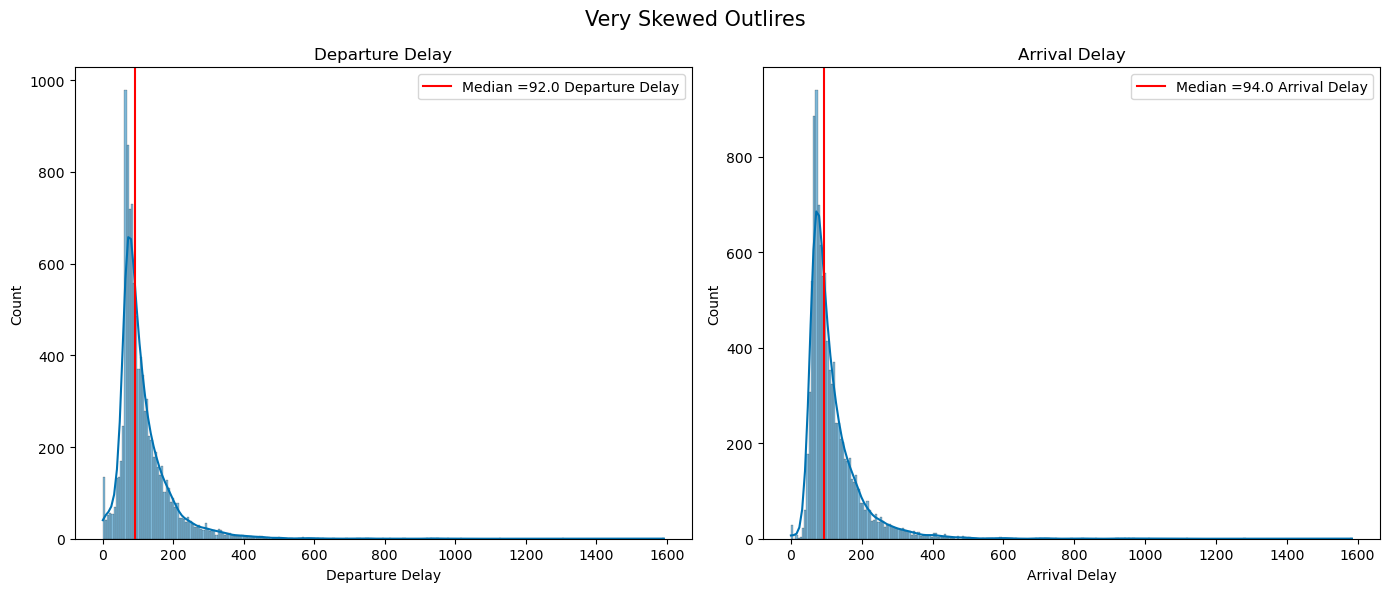

In [19]:
fig,axs = plt.subplots(1,len(numerical_columns)-2,figsize=(14,6))

for ind,col in enumerate(numerical_columns[2:]):
    sns.histplot(data=outlires,x=col,ax=axs[ind],kde=True)
    axs[ind].set_title(col)
    axs[ind].set_xlabel(col)
    axs[ind].axvline(outlires[col].median(),label=f'Median ={outlires[col].median()} {col}',color='r')
    axs[ind].legend()
    
fig.suptitle("Very Skewed Outlires",size=15)
fig.tight_layout()
plt.show()

In [20]:
data.drop(outlires.index,axis=0,inplace=True)

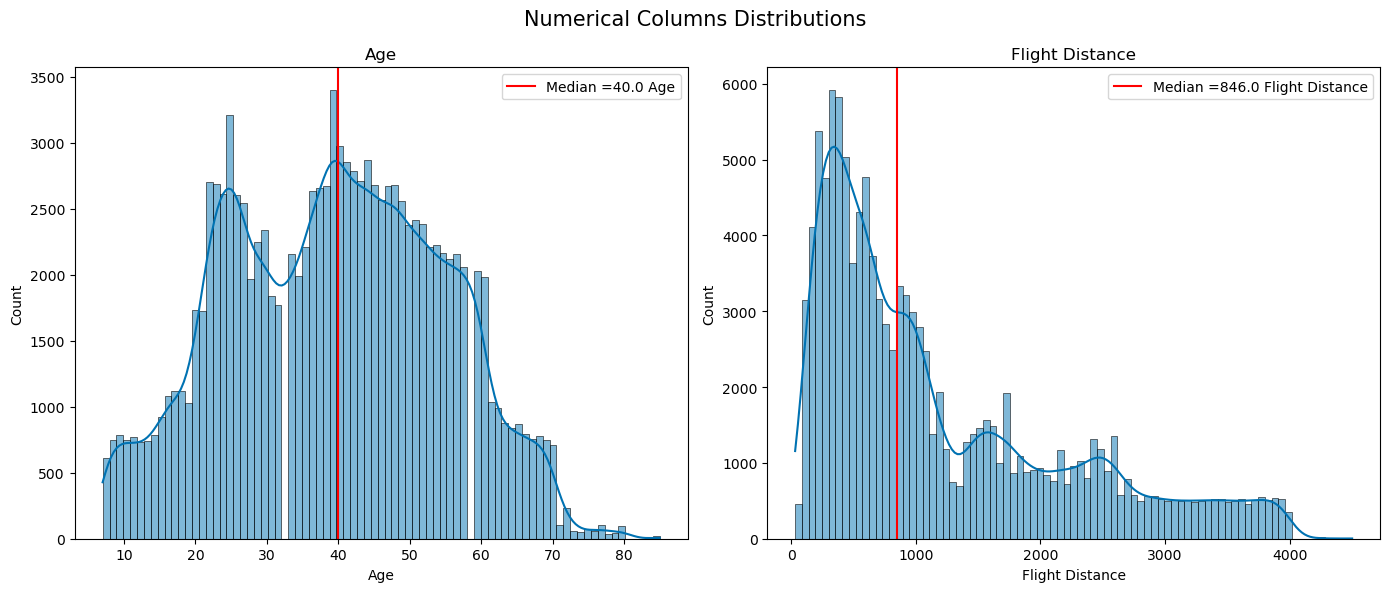

In [21]:
fig,axs = plt.subplots(1,len(numerical_columns)-2,figsize=(14,6))

for ind,col in enumerate(numerical_columns[:2]):
    sns.histplot(data=data,x=col,ax=axs[ind],kde=True)
    axs[ind].set_title(col)
    axs[ind].set_xlabel(col)
    axs[ind].axvline(data[col].median(),label=f'Median ={data[col].median()} {col}',color='r')
    axs[ind].legend()
    
fig.suptitle("Numerical Columns Distributions",size=15)
fig.tight_layout()
plt.show()

In [41]:
data['Total Time Delay'] = data['Arrival Delay']+data['Departure Delay']
data['Total Time Delay']

0          7.0
1         65.0
2          0.0
3          0.0
4          1.0
          ... 
129875     5.0
129876     0.0
129877    20.0
129878    53.0
129879     0.0
Name: Total Time Delay, Length: 129880, dtype: float64

In [92]:
for col in ['Arrival Delay','Departure Delay','Total Time Delay']:
    data[str(col+'_Category')] = pd.cut(data[col],bins=[0,1,10,20,60,data[col].max()],
           labels=['Less than Minute','1-10','10-20','20-60','More Than Hour'],
          include_lowest=True)

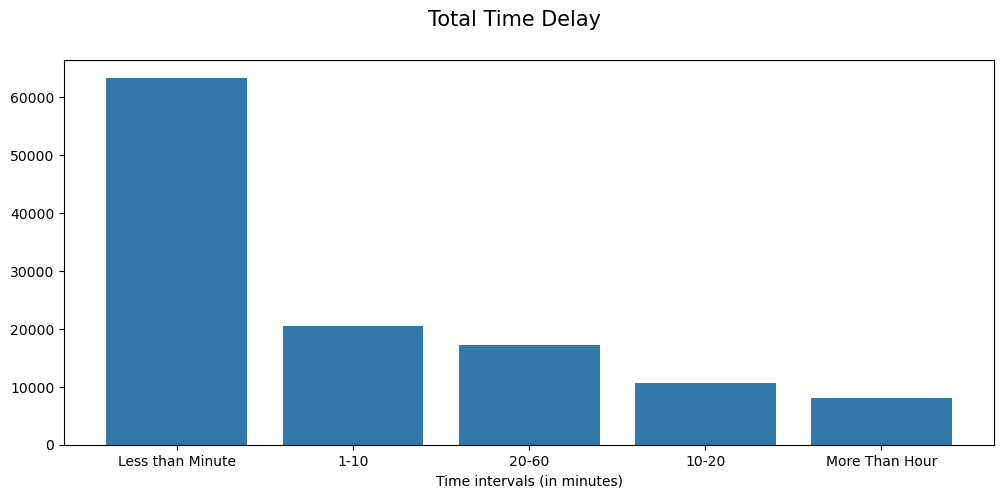

In [24]:
toplot = data['Total Time Delay'].value_counts()

fig,ax = plt.subplots(1,1,figsize=(12,5))

a = ax.bar(x=toplot.index,height=toplot,color='#3279a8')

ax.set_xlabel('Time intervals (in minutes)')
fig.suptitle("Total Time Delay",size=15)
plt.show()

In [25]:
# data.drop(columns=['Departure Delay','Arrival Delay'],inplace=True)

---

In [26]:
data.loc[:,'Departure and Arrival Time Convenience':'Satisfaction'].head(3)

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied


In [27]:
for col in data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling']:
    data[col] = pd.Categorical(data[col])
    data[col] = data[col].replace(0,data[col].mode()[0])

In [28]:
(data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling']).shape[1]

14

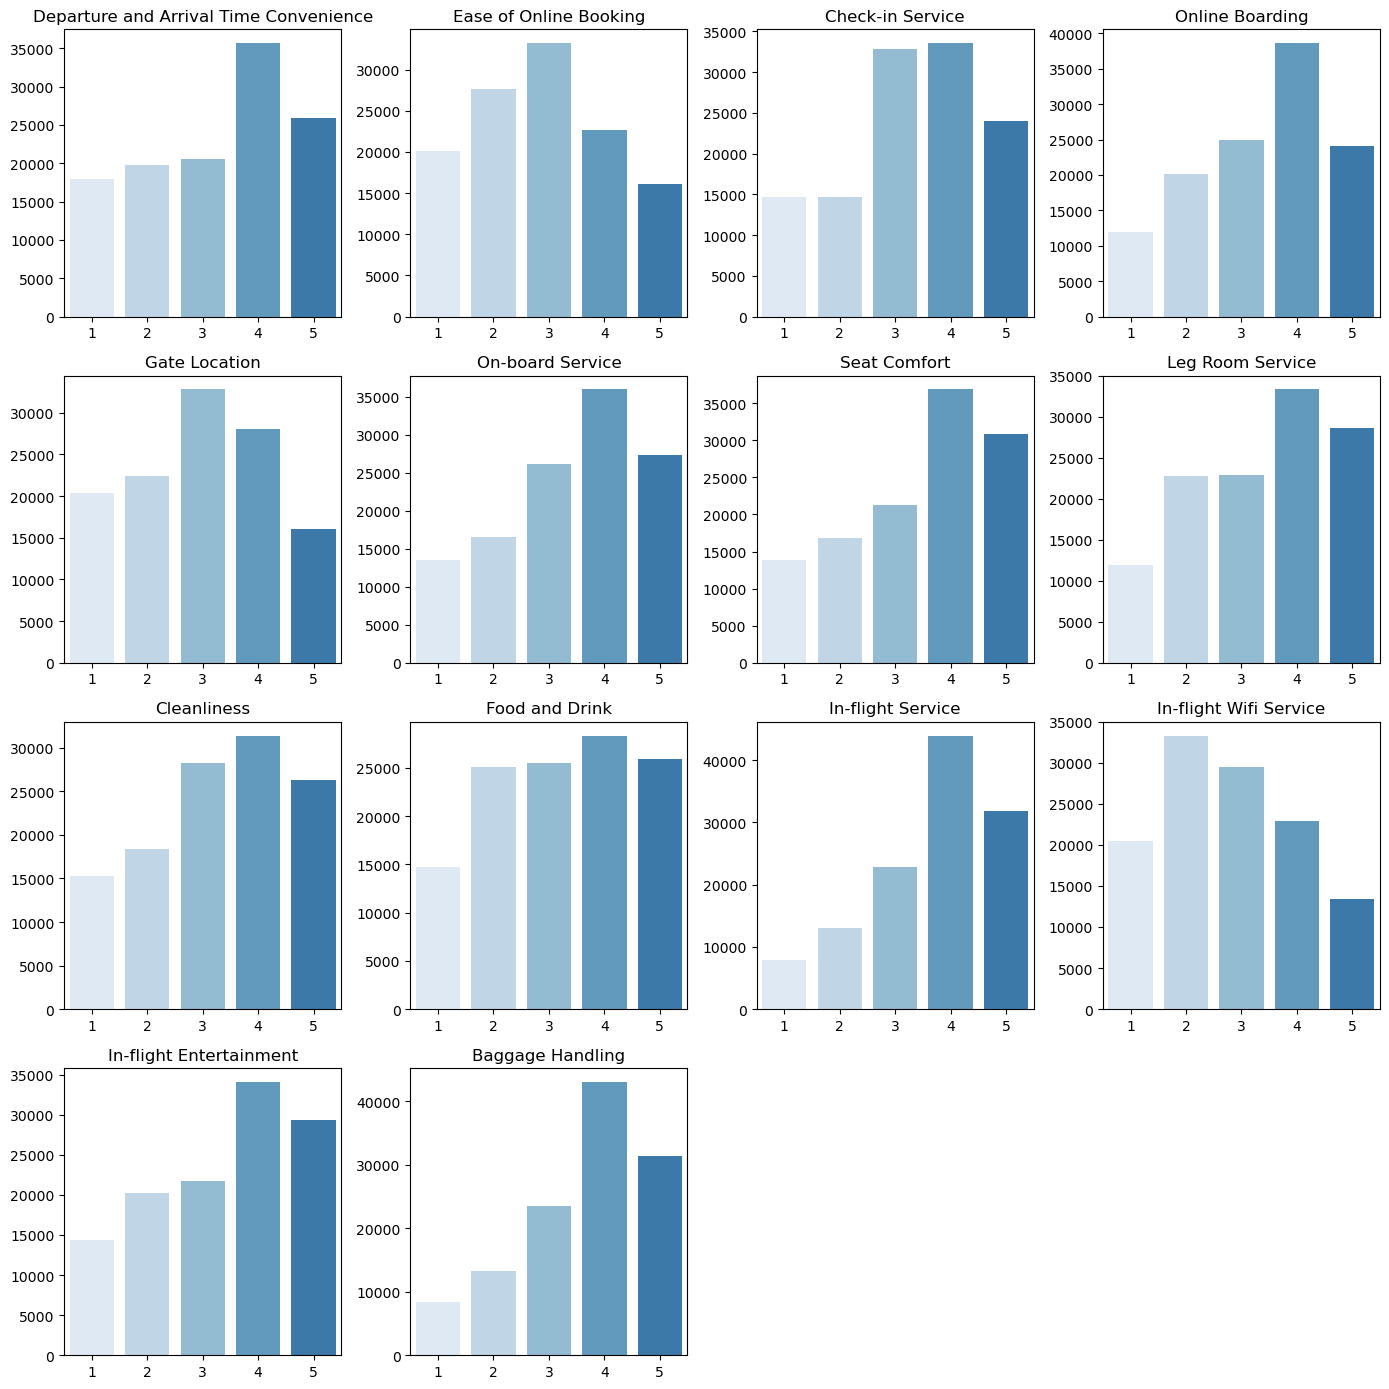

In [29]:
sns.set_palette('Blues')

fig = plt.figure(figsize=(14,14))
for i,d in enumerate(data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].columns):
    plt.subplot(4,4,i+1)
    sns.countplot(data=data,x=d)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(d,size=12)
        
fig.tight_layout()

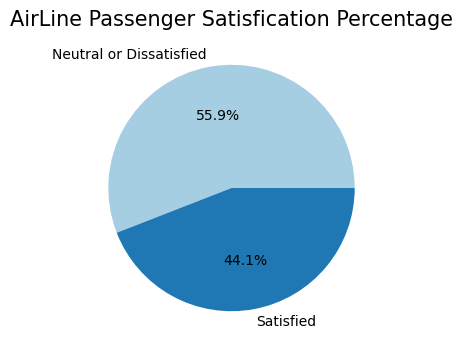

In [30]:
sns.set_palette('Paired')
fig,ax = plt.subplots(1,1,figsize=(4,4))
d = data['Satisfaction'].value_counts()
ax.pie(d,autopct = '%1.1f%%',labels=d.index)
ax.set_title('AirLine Passenger Satisfication Percentage',size=15)
plt.show()

---

<a name='4'></a>

## Bivarite Analysis

In [31]:
plt.style.use('seaborn-colorblind')

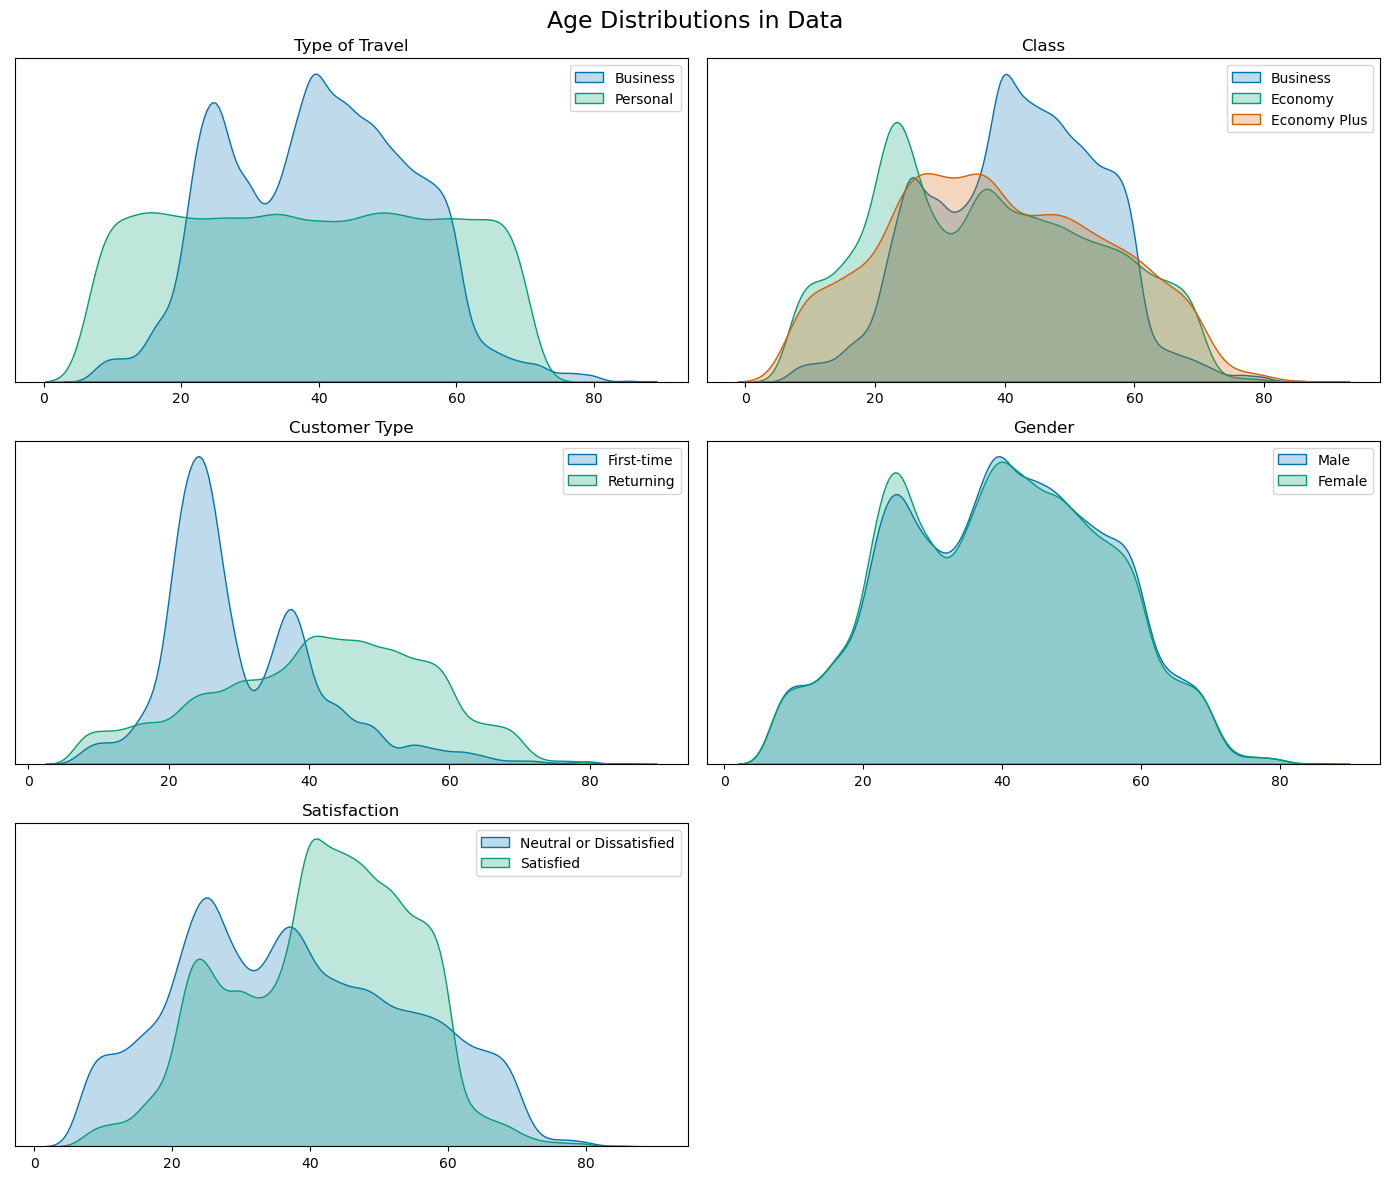

In [32]:
def automated_dist(num_col,additionalcolumns=0):
    fig = plt.figure(figsize=(14,12))
    
    if additionalcolumns:categorical_data.append(additionalcolumns)

    for i,col in enumerate(categorical_data):
        plt.subplot(3,2,i+1)
        toplot = data[col].unique().tolist()
        for ind,j in enumerate(toplot):
            g = sns.kdeplot(data = data[data[col]==j],x=num_col,label=j,fill=True)
        g.set_xlabel('')
        g.set_ylabel('')
        plt.yticks([])
        g.set_title(col)
        g.legend()

    fig.suptitle(f"{num_col} Distributions in Data",size=17)
    fig.tight_layout()
    plt.show()
automated_dist('Age')

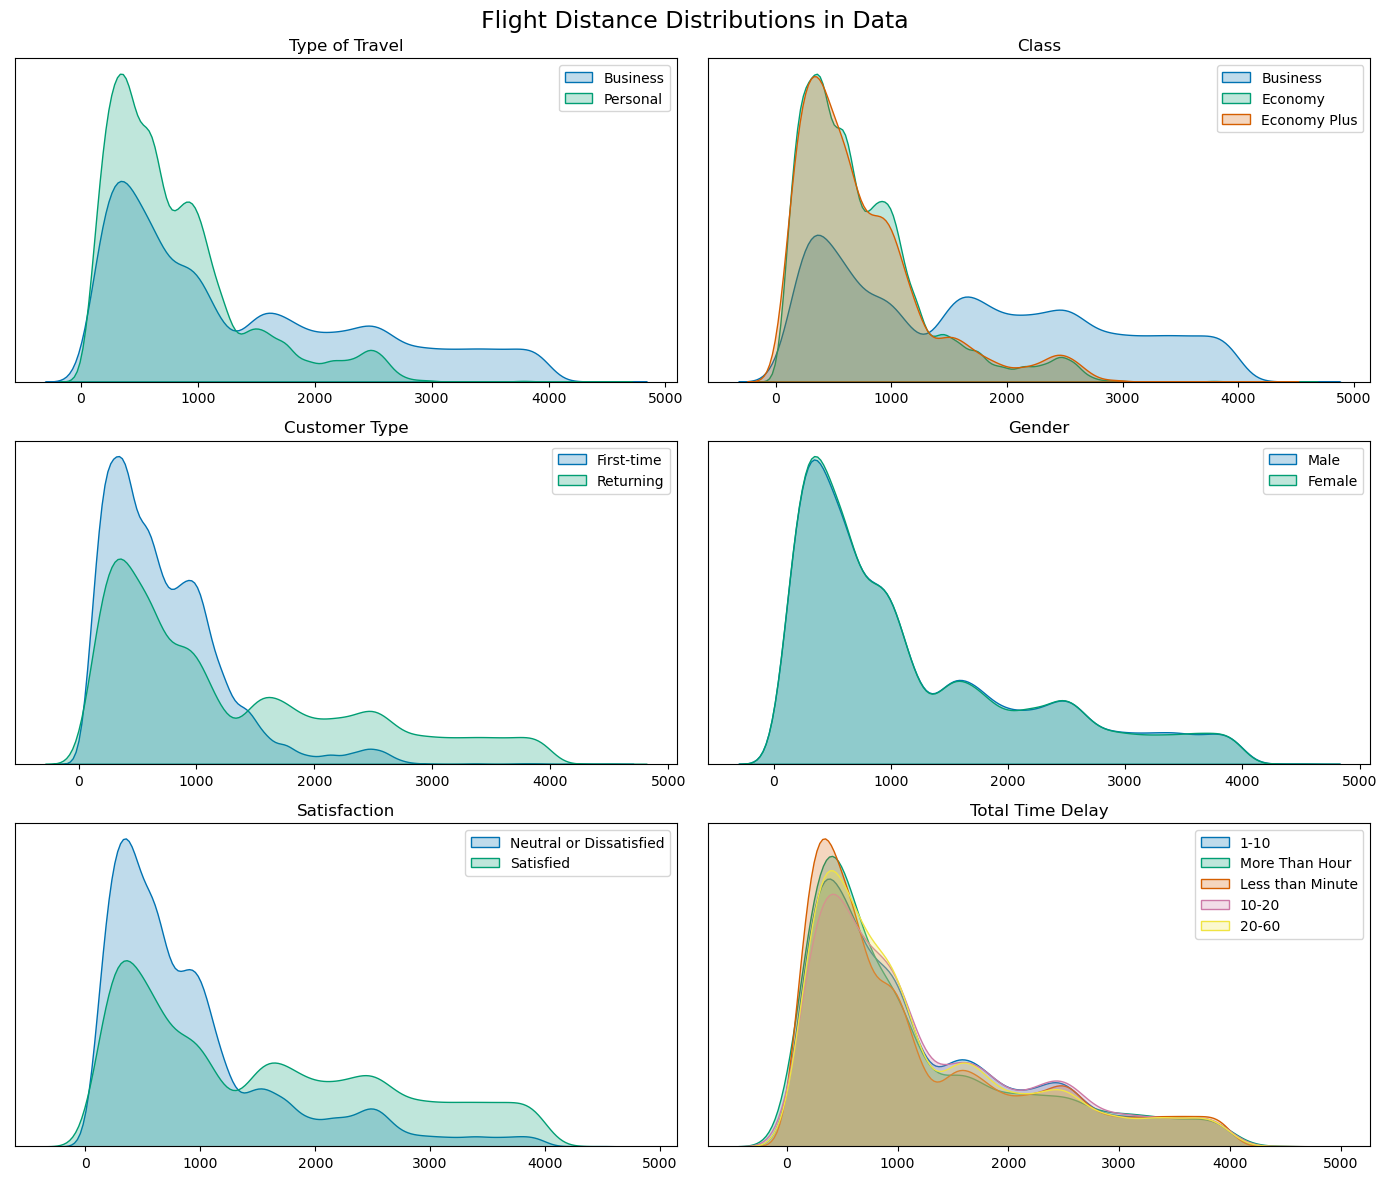

In [33]:
automated_dist('Flight Distance','Total Time Delay')

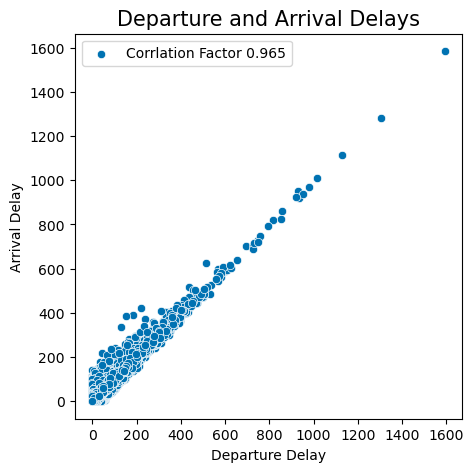

In [82]:
fig,ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=data,x='Departure Delay',y='Arrival Delay',ax=ax,
                label=f"Corrlation Factor {str(data['Departure Delay'].corr(data['Arrival Delay']))[:5]}")

ax.set_title("Departure and Arrival Delays",size=15)
plt.legend()
plt.show()


0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
129875    Neutral or Dissatisfied
129876    Neutral or Dissatisfied
129877    Neutral or Dissatisfied
129878                  Satisfied
129879    Neutral or Dissatisfied
Name: Satisfaction, Length: 129880, dtype: object

In [56]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total Time Delay,Arrival Delay_Category,Departure Delay_Category,Total Time Delay_Category
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,5,3,5,5,Neutral or Dissatisfied,7.0,1-10,1-10,1-10
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,3,5,2,5,5,Satisfied,65.0,20-60,20-60,More Than Hour
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,4,3,3,Satisfied,0.0,Less than Minute,Less than Minute,Less than Minute
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,4,5,2,5,5,Satisfied,0.0,Less than Minute,Less than Minute,Less than Minute
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,3,3,3,3,Satisfied,1.0,Less than Minute,Less than Minute,Less than Minute


In [100]:
# categorical_data.remove('Satisfaction')
# categorical_data.remove('Total Time Delay')
categorical_data.append('Total Time Delay_Category')

In [103]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [156]:
plt.style.use('seaborn-white')
sns.set_palette('Paired')

In [157]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

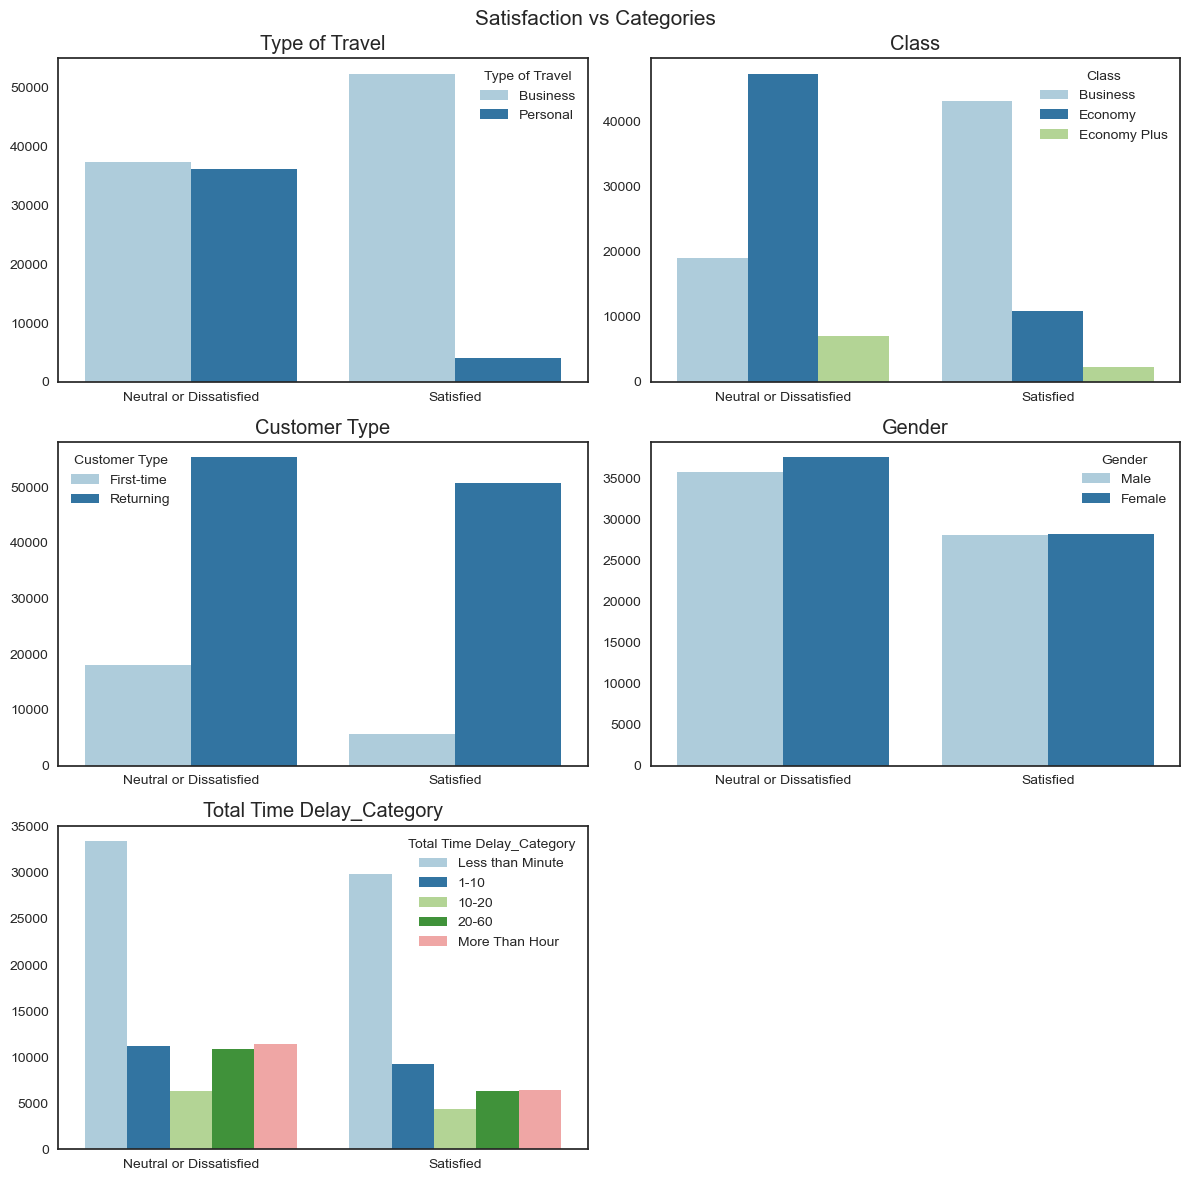

In [204]:
fig = plt.figure(figsize=(12,12))

for ind,col in enumerate(categorical_data):
    plt.subplot(3,2,ind+1)
    g = sns.countplot(data=data,x='Satisfaction',hue=col)
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_title(col)
    
fig.suptitle("Satisfaction vs Categories",size=15)
fig.tight_layout()
plt.show()

In [230]:
data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].columns.tolist()

['Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [295]:
def services_for_each(optional_col = ''):
    new = pd.DataFrame()
    rating_columns = data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].columns.tolist()
    new['Service'] = rating_columns
    if optional_col!='':
        
        for cat in data[optional_col].value_counts().index.tolist():
            lis = []
            for service in new['Service']:
                lis.append(data[data[optional_col]==cat][service].mean())
            new[cat] = lis
    else:
        lis = []
        for col in rating_columns:
            lis.append(data[col].mean())
        new['Rating'] = lis
    df_melted = new.melt(id_vars=['Service'], value_vars=new.columns[1:].tolist(), var_name='Groups')
    return df_melted

In [345]:
# categorical_data.remove('Total Time Delay_Category')
categorical_data.remove('Satisfaction')
categorical_data

['Type of Travel', 'Class', 'Customer Type', 'Gender', 'Satisfaction']

In [358]:
sns.set_palette('Paired')

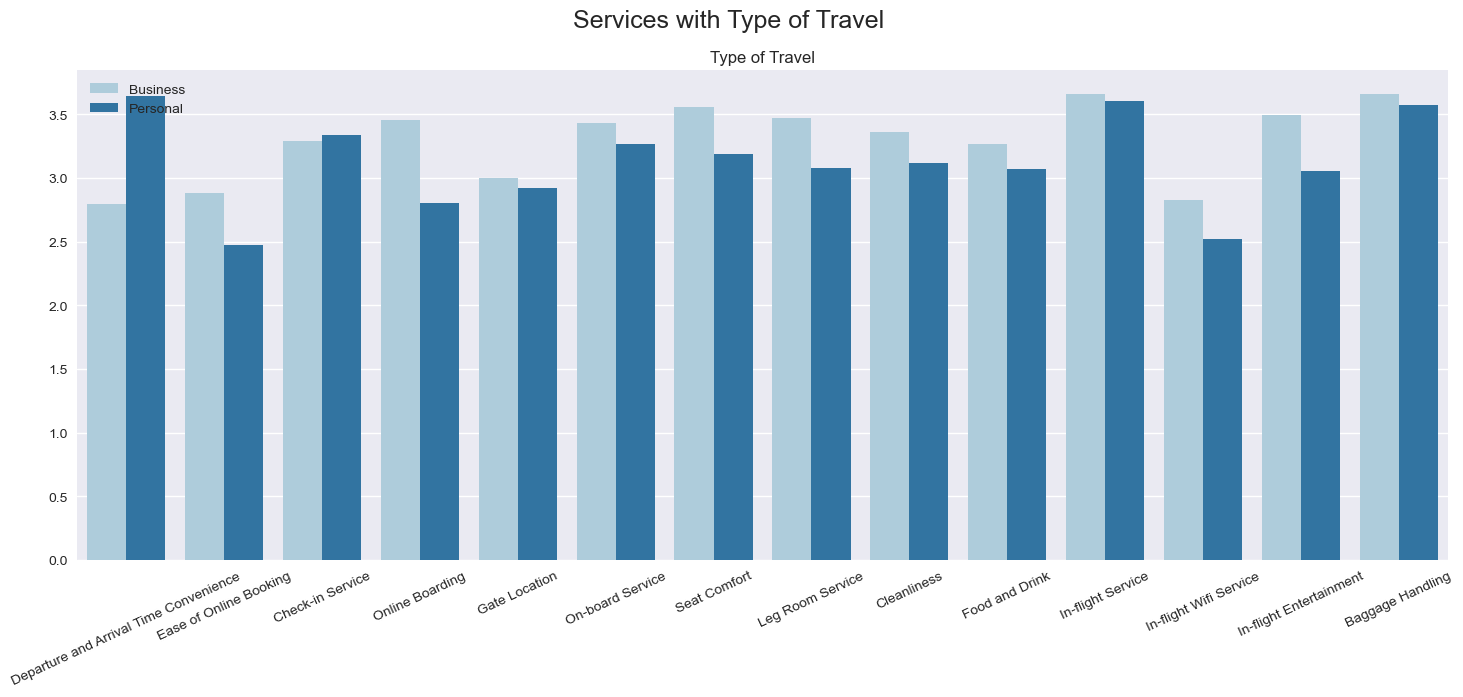

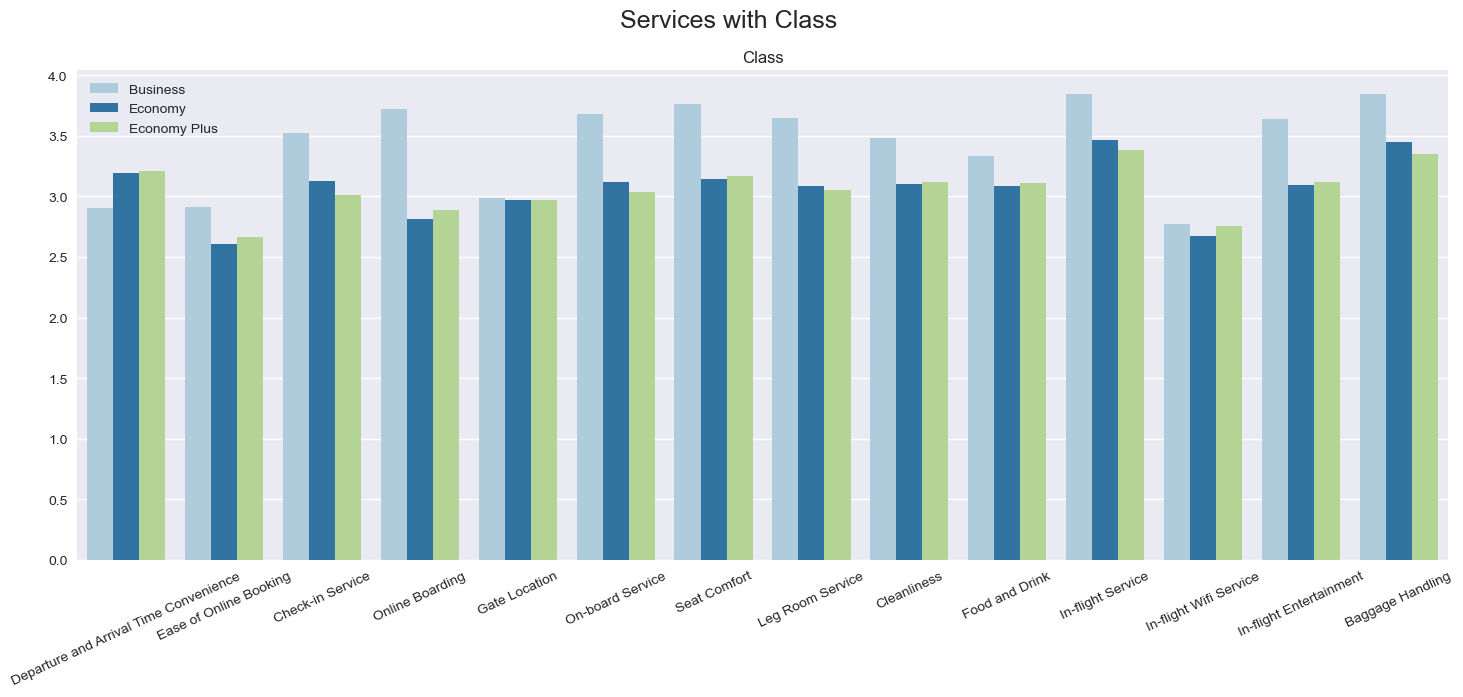

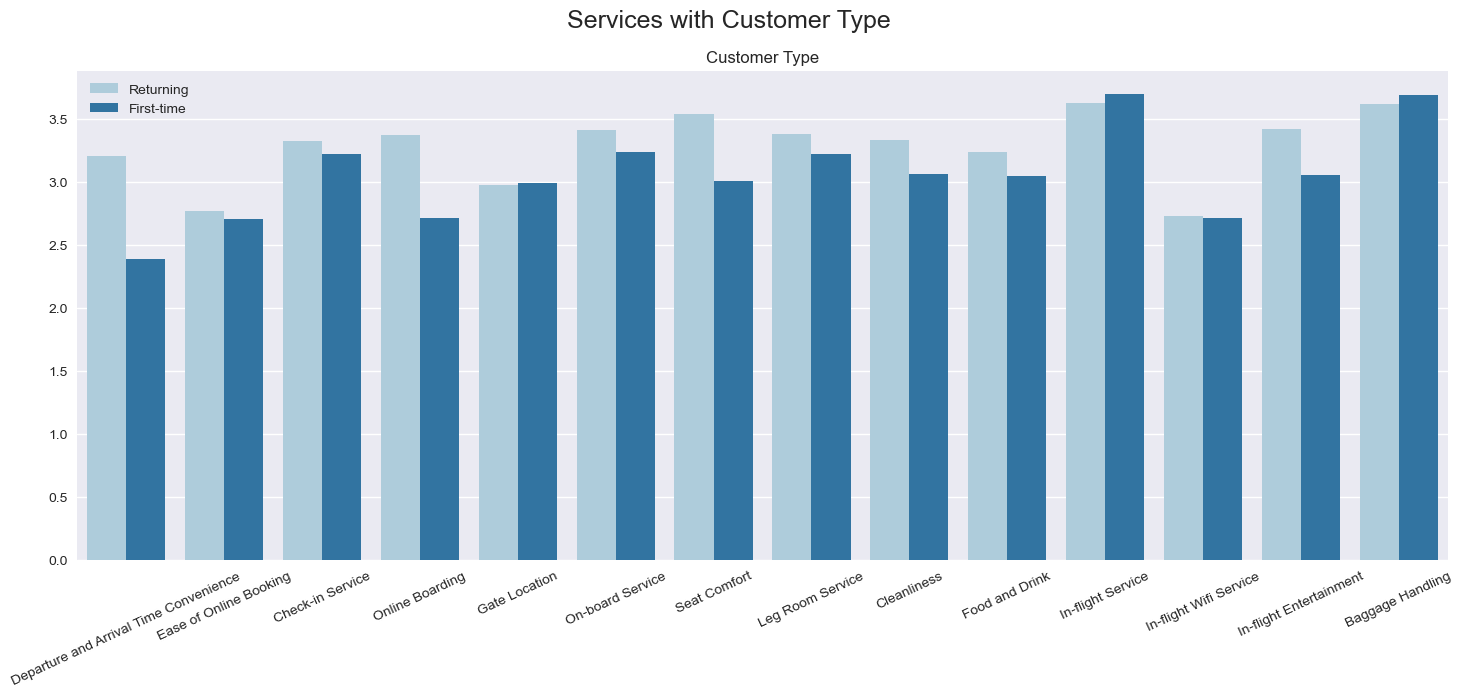

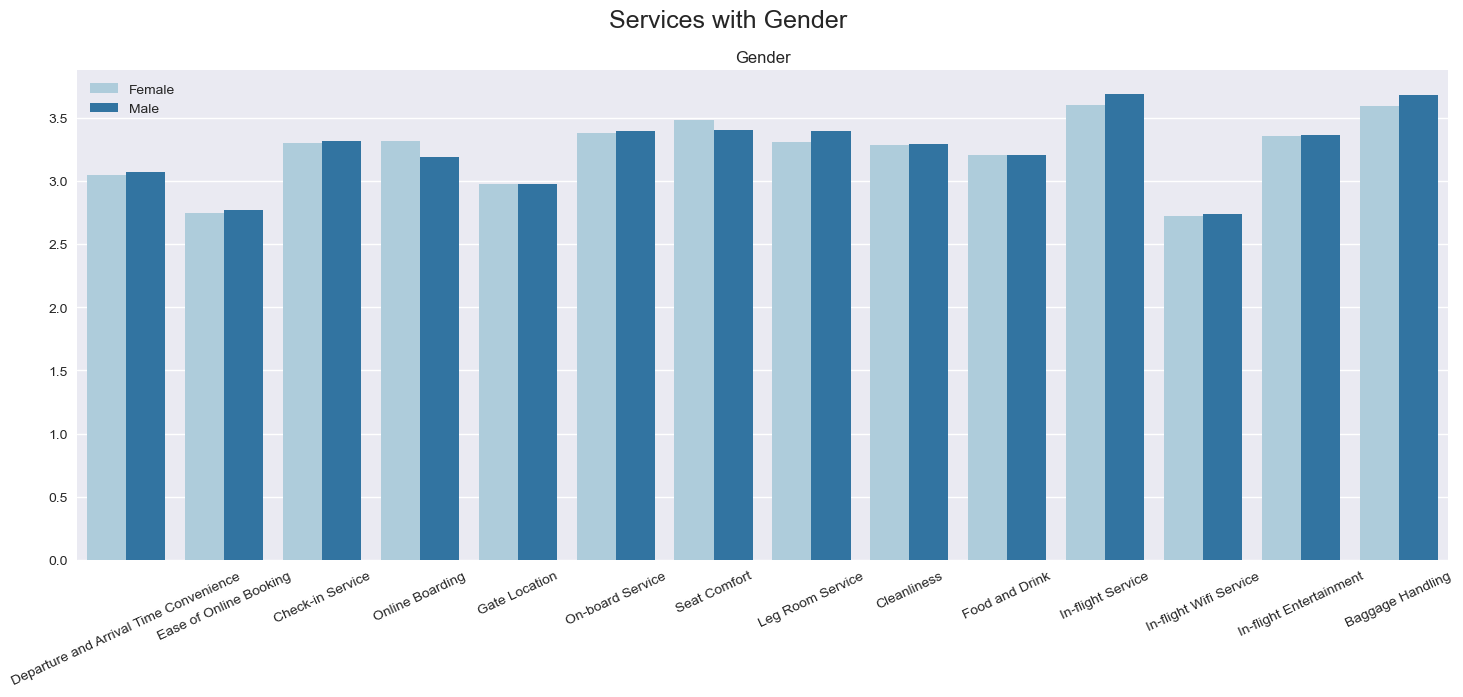

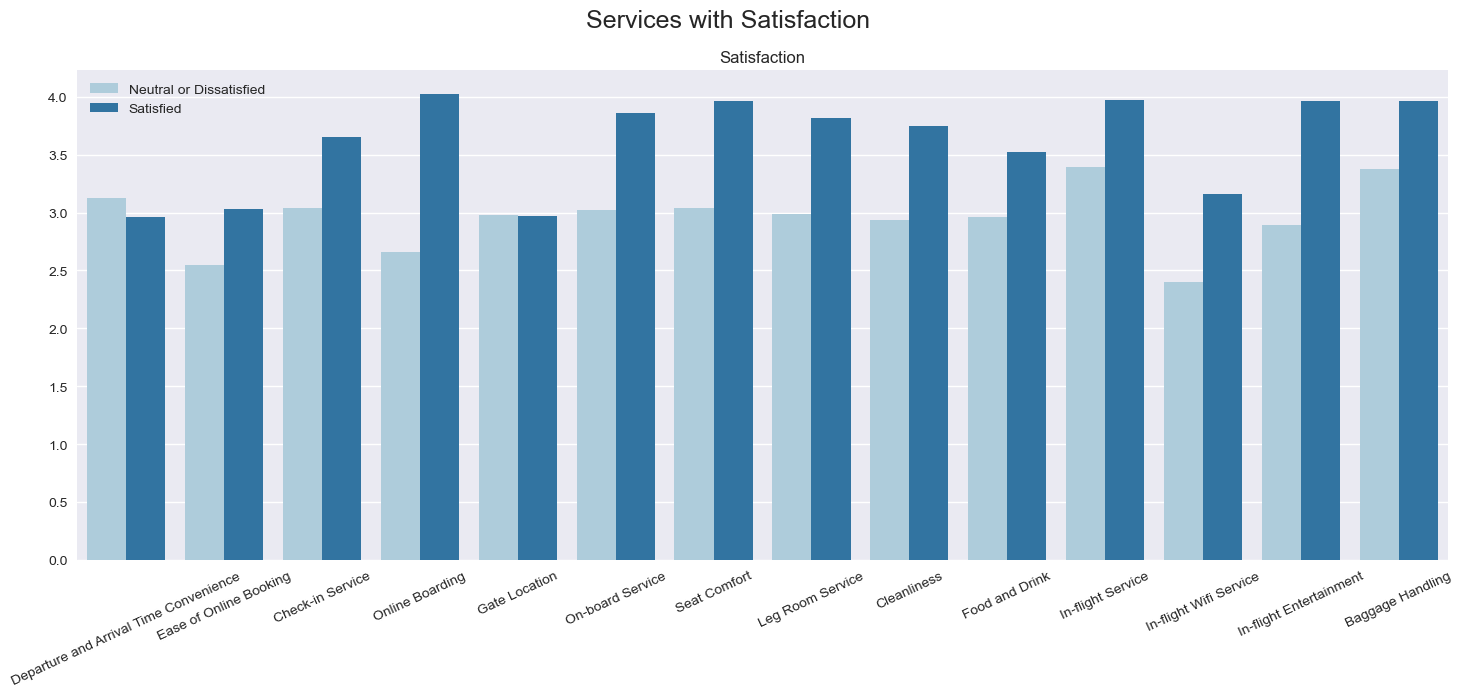

In [359]:
def service_show(col):
    fig,ax = plt.subplots(1,1,figsize=(15,6))

    created_data= services_for_each(col)
    a = sns.barplot(data=created_data,y='value',x='Service',hue='Groups',ax=ax)
    a.set_title(col)
    a.set_ylabel('')
    a.set_xlabel('')
    a.legend()

    fig.suptitle(f"Services with {col}",size=18)
    fig.tight_layout()
    plt.xticks(rotation=25)
    plt.show()

for f in categorical_data:
    service_show(f)

In [202]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total Time Delay,Arrival Delay_Category,Departure Delay_Category,Total Time Delay_Category
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,5,3,5,5,Neutral or Dissatisfied,7.0,1-10,1-10,1-10
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,3,5,2,5,5,Satisfied,65.0,20-60,20-60,More Than Hour
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,4,3,3,Satisfied,0.0,Less than Minute,Less than Minute,Less than Minute
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,4,5,2,5,5,Satisfied,0.0,Less than Minute,Less than Minute,Less than Minute
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,3,3,3,3,Satisfied,1.0,Less than Minute,Less than Minute,Less than Minute


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   ID                                      129880 non-null  int64   
 1   Gender                                  129880 non-null  object  
 2   Age                                     129880 non-null  int64   
 3   Customer Type                           129880 non-null  object  
 4   Type of Travel                          129880 non-null  object  
 5   Class                                   129880 non-null  object  
 6   Flight Distance                         129880 non-null  int64   
 7   Departure Delay                         129880 non-null  int64   
 8   Arrival Delay                           129487 non-null  float64 
 9   Departure and Arrival Time Convenience  129880 non-null  int64   
 10  Ease of Online Booking          